# preprocessing code

In [21]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

file_path = "C:\\Users\\HP\\Desktop\\smmh.csv"
data = pd.read_csv(file_path)

# Select features and target
features = ['1. What is your age?', '2. Gender', '8. What is the average time you spend on social media every day?',
           '12. On a scale of 1 to 5, how easily distracted are you?', 
           '15. On a scale of 1-5, how often do you compare yourself to other successful people through the use of social media?']
target = '11. Do you feel restless if you haven\'t used Social media in a while?'
df = data[features + [target]].copy()  # Explicitly create a copy to avoid slice issues
df.columns = ['Age', 'Gender', 'Usage_Time', 'Distraction', 'Comparison', 'Restless']

# Convert target to binary using .loc
df.loc[:, 'Restless'] = df['Restless'].apply(lambda x: 0 if x <= 3 else 1)

# Encode categorical variables using .loc
le_gender = LabelEncoder()
le_usage = LabelEncoder()
df.loc[:, 'Gender'] = le_gender.fit_transform(df['Gender'])
df.loc[:, 'Usage_Time'] = le_usage.fit_transform(df['Usage_Time'])

# to split data
X = df.drop('Restless', axis=1)
y = df['Restless']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# to display the data
print(df.head())

    Age Gender Usage_Time  Distraction  Comparison  Restless
0  21.0      1          1            5           2         0
1  21.0      0          5            4           5         0
2  21.0      0          2            2           3         0
3  21.0      0          5            3           5         0
4  21.0      0          1            4           3         1


# Building and Pruning the Tree


Unpruned Accuracy: 0.72, Depth: 17
Pruned Accuracy: 0.80, Depth: 3


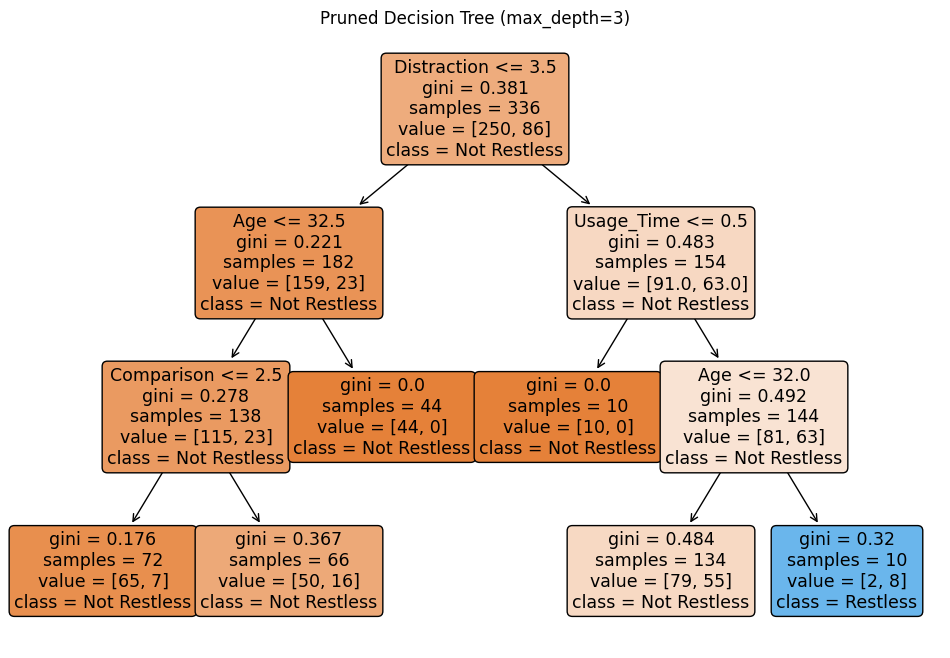

In [33]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Unpruned Tree
dt_unpruned = DecisionTreeClassifier(random_state=42)
dt_unpruned.fit(X_train, y_train)
y_pred_unpruned = dt_unpruned.predict(X_test)
acc_unpruned = accuracy_score(y_test, y_pred_unpruned)
print(f"Unpruned Accuracy: {acc_unpruned:.2f}, Depth: {dt_unpruned.get_depth()}")

# Pruned Tree
dt_pruned = DecisionTreeClassifier(max_depth=3, random_state=42)
dt_pruned.fit(X_train, y_train)
y_pred_pruned = dt_pruned.predict(X_test)  # Fixed: Use dt_pruned, not dt_pr
acc_pruned = accuracy_score(y_test, y_pred_pruned)
print(f"Pruned Accuracy: {acc_pruned:.2f}, Depth: {dt_pruned.get_depth()}")

# Visualize Pruned Tree
plt.figure(figsize=(12, 8))
plot_tree(dt_pruned, feature_names=X.columns, class_names=['Not Restless', 'Restless'], filled=True, rounded=True)
plt.title("Pruned Decision Tree (max_depth=3)")
plt.show()

# accuracy vs depth


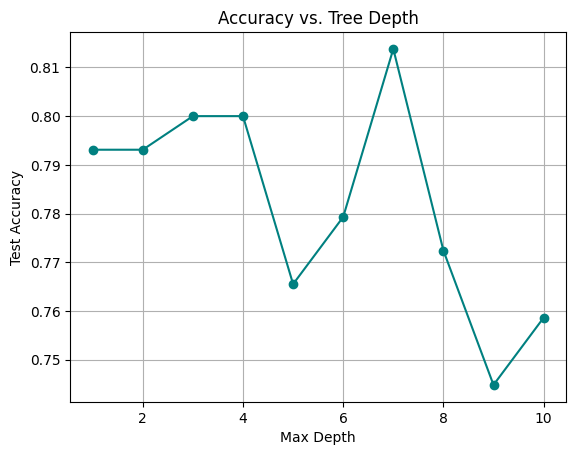

In [35]:
depths = range(1, 11)
accs = []
for depth in depths:
    dt = DecisionTreeClassifier(max_depth=depth, random_state=42)
    dt.fit(X_train, y_train)
    accs.append(accuracy_score(y_test, dt.predict(X_test)))

plt.plot(depths, accs, marker='o', color='teal')
plt.xlabel("Max Depth")
plt.ylabel("Test Accuracy")
plt.title("Accuracy vs. Tree Depth")
plt.grid(True)
plt.show()

# Feature importance

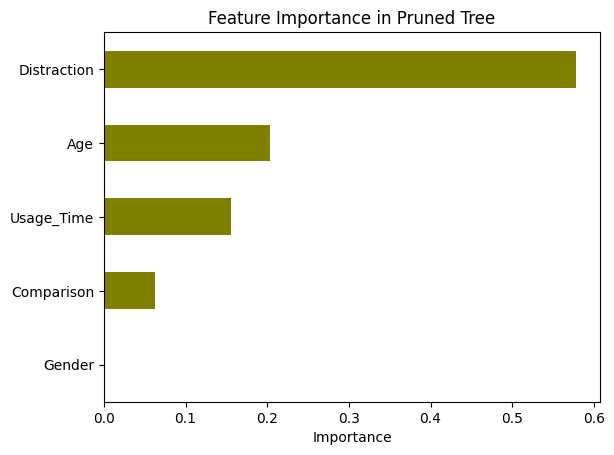

In [39]:
importances = pd.Series(dt_pruned.feature_importances_, index=X.columns)
importances.sort_values().plot(kind='barh', color='olive')
plt.title('Feature Importance in Pruned Tree')
plt.xlabel('Importance')
plt.show()

# data visualisation using histogram

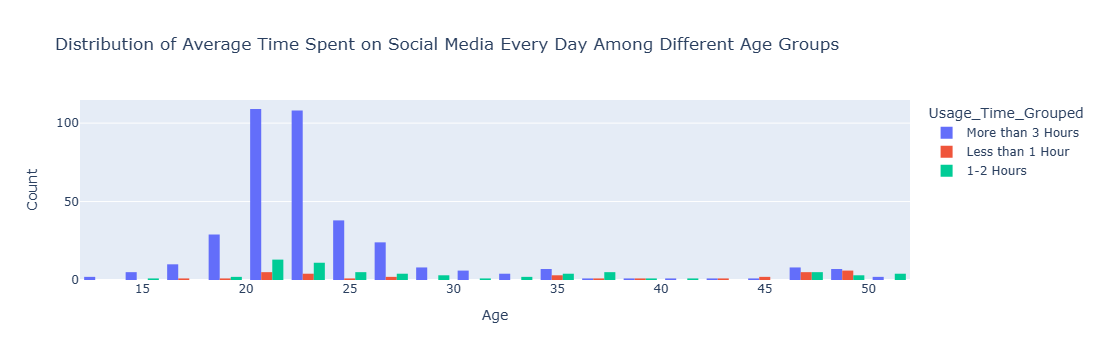

In [25]:
import pandas as pd
import plotly.express as px

# Load data
file_path = "C:\\Users\\HP\\Desktop\\smmh.csv"
data = pd.read_csv(file_path)

# Select relevant columns
df = data[['1. What is your age?', '8. What is the average time you spend on social media every day?']]

# Rename columns for simplicity
df.columns = ['Age', 'Usage_Time']

# Filter data for age less than or equal to 50
df = df[df['Age'] <= 50]

# Define a function to group usage time
def group_usage_time(time):
    if time == 'Less than an Hour':
        return 'Less than 1 Hour'
    elif time == 'Between 1 and 2 hours':
        return '1-2 Hours'
    else:
        return 'More than 3 Hours'

# Apply the grouping function to the 'Usage_Time' column
df['Usage_Time_Grouped'] = df['Usage_Time'].apply(group_usage_time)

# Drop rows with missing values
df.dropna(inplace=True)

# Plot the histogram of average time spent on social media every day among different age groups
fig = px.histogram(df, x='Age', color='Usage_Time_Grouped', barmode='group', title='Distribution of Average Time Spent on Social Media Every Day Among Different Age Groups')
fig.update_layout(xaxis_title='Age', yaxis_title='Count')
fig.show()